In [19]:
import pandas as pd
import csv
from pathlib import Path
import json
import numpy as np
from datetime import datetime
import time
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.graph_objects as go

In [20]:
root_path = ###deleted for security reasons###
out_path = ###deleted for security reasons###
pic_path = ###deleted for security reasons###

# import data

## all

In [21]:
cofacts_daily_views = []
tformat = "%Y-%m-%d"
with open(root_path/'cofacts_20220319-20220513.json' , 'r', encoding='big5') as reader:
    data = json.loads(reader.read())
    for idx, article in enumerate(data):
        for d in article['stats']:
            ori_time = datetime.strptime(d['date'].split('T')[0], tformat)
            if ori_time >= datetime.strptime('2022-03-19', tformat) and ori_time <= datetime.strptime('2022-05-13', tformat):
                view_list = [v for v in d.values()]
                cofacts_daily_views.append([article['id'], d['date'].split('T')[0], sum([0 if value==None else value for value in view_list[:-1]])])

In [22]:
cofacts_daily_views_df = pd.DataFrame(cofacts_daily_views, columns=['article_id', 'date', 'views'])

In [23]:
len(set(cofacts_daily_views_df.article_id))

22525

## subject

In [24]:
covid_article_id = set()
with open(root_path/"cofacts_covid_20220319-20220513.json", "r", encoding='big5') as reader:
    data = json.loads(reader.read())
    for article in data:
        for idx in data.keys():
            covid_article_id.add(data[idx]['article_id'])

In [25]:
len(covid_article_id)

6509

In [26]:
coexist_article_id = set()
with open(root_path/"cofacts_coexist_20220319-20220513.json", "r", encoding='big5') as reader:
    data = json.loads(reader.read())
    for article in data:
        for idx in data.keys():
            coexist_article_id.add(data[idx]['article_id'])

In [103]:
round(len(coexist_article_id)/6509, 4)

0.0158

In [28]:
vaccine_article_id = set()
with open(root_path/"cofacts_vaccine_20220319-20220513.json", "r", encoding='big5') as reader:
    data = json.loads(reader.read())
    for article in data:
        for idx in data.keys():
            vaccine_article_id.add(data[idx]['article_id'])

In [104]:
round(len(vaccine_article_id)/6509, 4)

0.4265

In [30]:
rapid_test_article_id = set()
with open(root_path/"cofacts_rapid_test_20220319-20220513.json", "r", encoding='big5') as reader:
    data = json.loads(reader.read())
    for article in data:
        for idx in data.keys():
            rapid_test_article_id.add(data[idx]['article_id'])

In [105]:
round(len(rapid_test_article_id)/6509, 4)

0.088

# venn

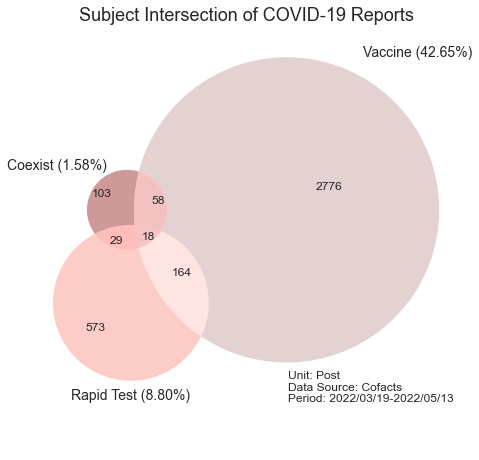

In [106]:
from matplotlib_venn import venn3

plt.figure(figsize=(8,8), facecolor='white', edgecolor='white')
plt.title('Subject Intersection of COVID-19 Reports', fontsize=18, y=1)

# Make the diagram
out = venn3(subsets = (len(coexist_article_id), len(vaccine_article_id), len(coexist_article_id.intersection(vaccine_article_id)), 
                 len(rapid_test_article_id),len(rapid_test_article_id.intersection(coexist_article_id)), 
                 len(rapid_test_article_id.intersection(vaccine_article_id)), 
                 len(coexist_article_id.intersection(vaccine_article_id).intersection(rapid_test_article_id))),
     set_labels = ('Coexist (1.58%)', 'Vaccine (42.65%)', 'Rapid Test (8.80%)'),
     set_colors=['darkred', 'rosybrown', 'salmon'])

for text in out.set_labels:
    text.set_fontsize(14)
for text in out.subset_labels:
    text.set_fontsize(12)
    
plt.annotate('Unit: Post\nData Source: Cofacts\nPeriod: 2022/03/19-2022/05/13', 
             (0.5,0.1), xycoords='figure fraction', fontsize=12)

plt.savefig(pic_path/"Intersection of COVID-19 Subjects.png", 
            bbox_inches='tight') 

plt.show()

# donut

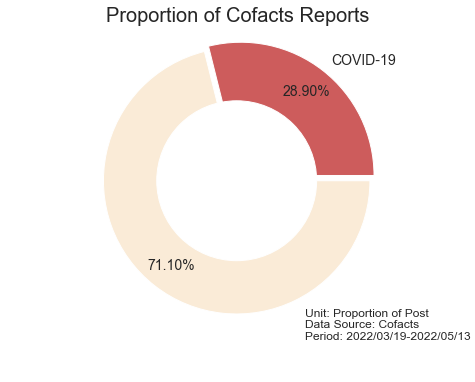

In [71]:
plt.figure(figsize=(8,6), facecolor='white', edgecolor='white')
plt.title('Proportion of Cofacts Reports', fontsize=20, y=1)
plt.subplots_adjust(left = 0.1, bottom = 0.2, right = 0.9, top = 0.9, wspace = 0.1, hspace = 0.1)
sns.set_style('whitegrid')

size_of_groups=[len(set(cofacts_daily_views_df.article_id)) - len(covid_article_id), 
                len(covid_article_id)]
# Create a pie plot
separated = (0, .05)
colors = ['antiquewhite', 'indianred']
labels = ['','COVID-19']
plt.pie(size_of_groups, counterclock=False, textprops = {"fontsize" : 14},
        autopct = "%1.2f%%", pctdistance=0.8,
        explode=separated, colors=colors, labels=labels)

# add a white circle at the center
my_circle=plt.Circle((0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')

plt.annotate('Unit: Proportion of Post\nData Source: Cofacts\nPeriod: 2022/03/19-2022/05/13', 
             (0.53,0.1), xycoords='figure fraction', fontsize=12)

plt.savefig(pic_path/"proportion_covid_all_donut.png", 
            bbox_inches='tight') 

plt.show()